In [4]:
library("seqinr")
library("zoo")
library("ggplot2")
library('reshape')
library('dplyr')
library('stringr')
library(Biostrings)
library("msa")
library("ape")

### Questions for Sensei 
1. Should I also include bar-graphs for 3-mers?
2. Last part.

The viruses I'm planning to analyze and compare with the two Zika virus strains are: 
1. Yellow Fever Virus 
2. West Nile Virus
3. Japanese Encephalitis Virus 
4. West Nile Virus

In [5]:
seqs <- read.fasta("FinalSequences.fna")
length(seqs)

[1] 6

In [6]:
getAnnot(seqs)

[[1]]
[1] ">NC_002031.1 Yellow fever virus, complete genome"

[[2]]
[1] ">NC_001563.2 West Nile virus lineage 2, complete genome"

[[3]]
[1] ">NC_001437.1 Japanese encephalitis virus, genome"

[[4]]
[1] ">NC_009942.1 West Nile virus lineage 1, complete genome"

[[5]]
[1] ">NC_012532.1 Zika virus, complete genome"

[[6]]
[1] ">NC_035889.1 Zika virus isolate ZIKV/H. sapiens/Brazil/Natal/2015, complete genome"

In [7]:
yellow_fever <- seqs[[1]]
west_nile1 <- seqs[[2]]
encephalitis <- seqs[[3]]
west_nile2 <- seqs[[4]]
zika_monkey <- seqs[[5]] 
zika_human <- seqs[[6]]

### Summarising the attributes of the various sequences
First, the lengths, compositions and GC contents of the various sequences.

In [8]:
sum <- sapply(seqs, summary)
sum

NC_002031.1            NC_001563.2           
length      10862                  10962                 
composition 2963, 2314, 3087, 2498 2997, 2497, 3100, 2368
GC          0.4972381              0.510582              
            NC_001437.1            NC_009942.1           
length      10976                  11029                 
composition 3047, 2531, 3113, 2285 3017, 2470, 3172, 2370
GC          0.5142128              0.5115604             
            NC_012532.1            NC_035889.1           
length      10794                  10808                 
composition 2991, 2359, 3139, 2305 2956, 2383, 3157, 2312
GC          0.5093571              0.5125833

Now, we look at the 2-mers and 3-mers. 

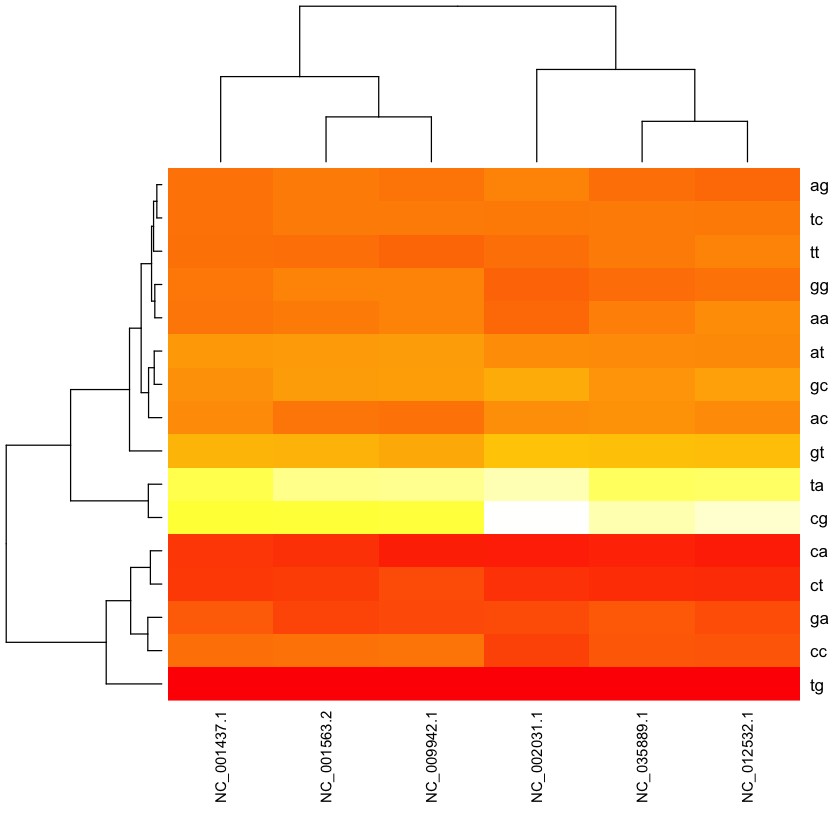

In [9]:
#2-mers 
myrho <- sapply(seqs, rho, wordsize = 2)
heatmap(myrho,margins=c(7, 2), cexCol=0.9, scale="none", col=rev(heat.colors(999)))

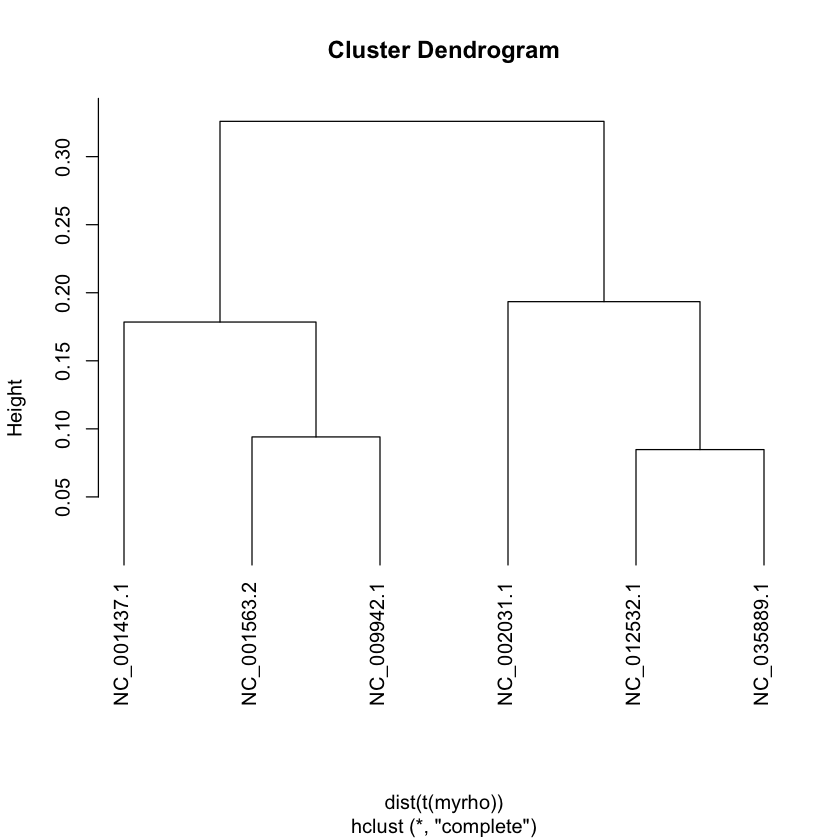

In [10]:
plot(hclust(dist(t(myrho))), hang=-1)

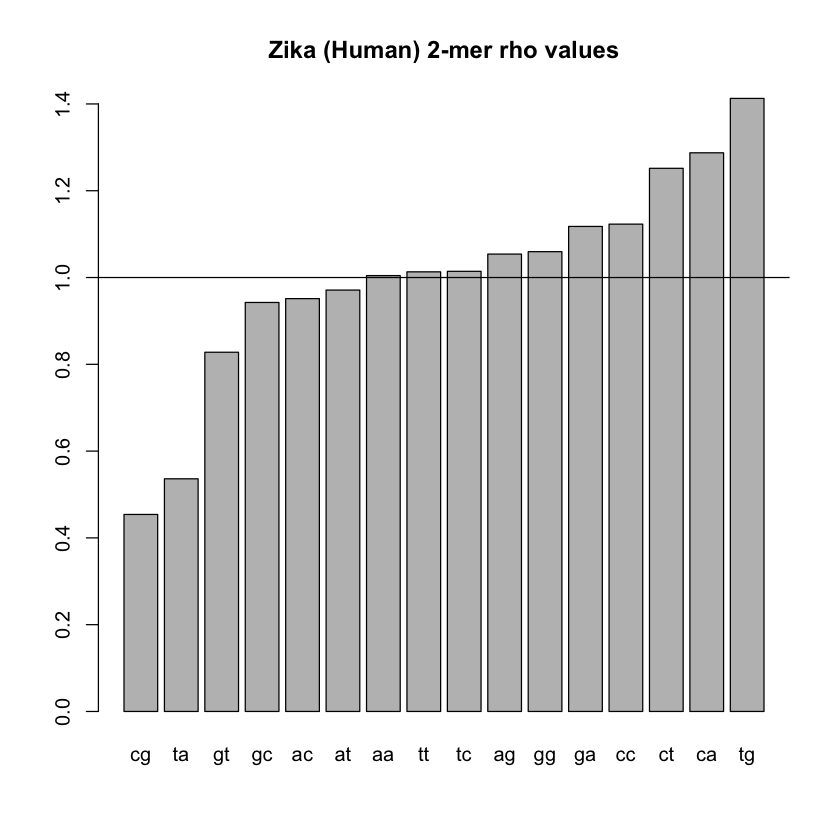

In [11]:
barplot(sort(rho(seq = zika_human, wordsize = 2)), main="Zika (Human) 2-mer rho values")
abline(h=1) 

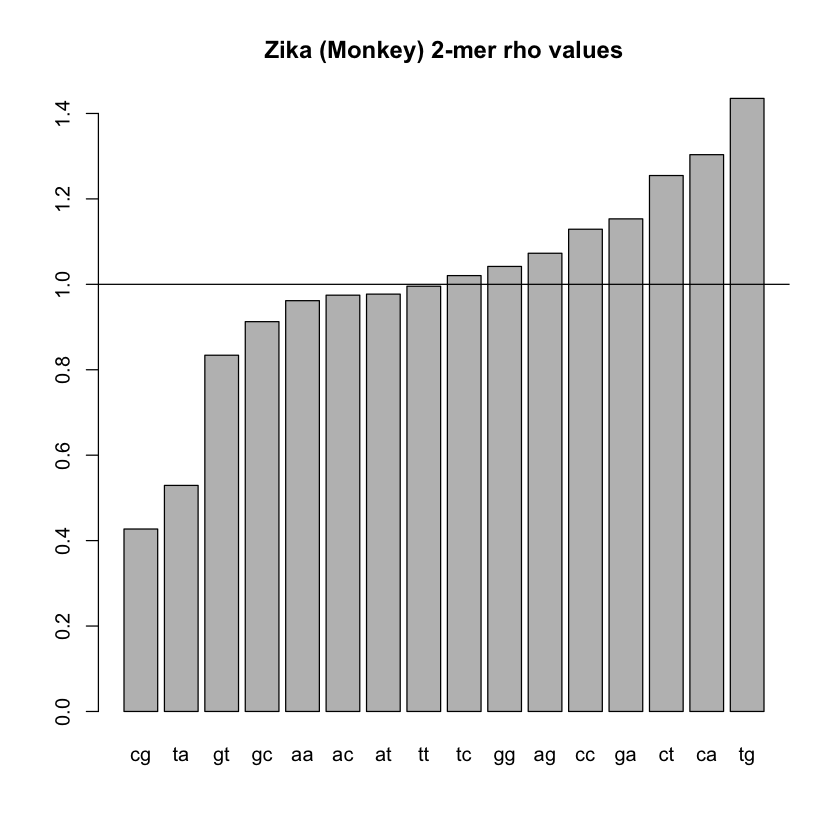

In [12]:
barplot(sort(rho(seq = zika_monkey, wordsize = 2)), main="Zika (Monkey) 2-mer rho values")
abline(h=1) 

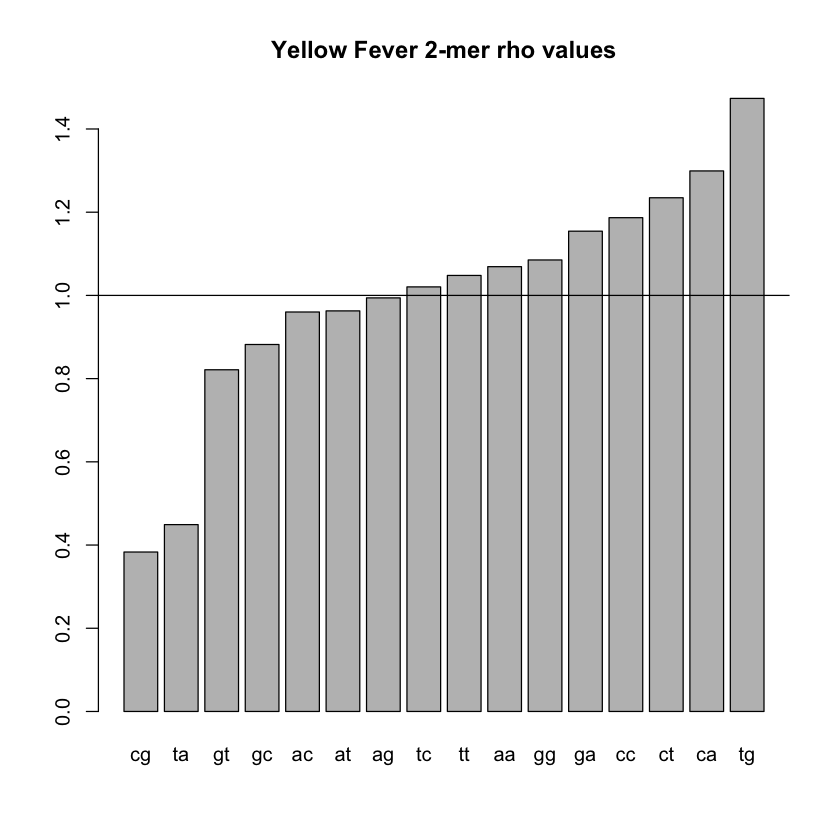

In [13]:
barplot(sort(rho(seq = yellow_fever, wordsize = 2)), main="Yellow Fever 2-mer rho values")
abline(h=1) 

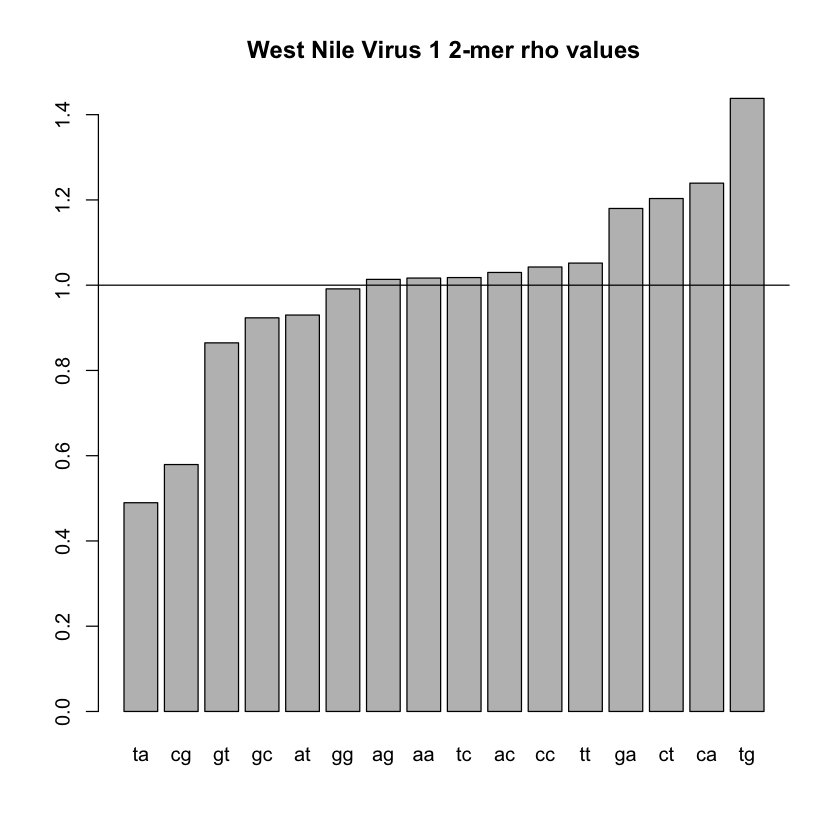

In [14]:
barplot(sort(rho(seq = west_nile1, wordsize = 2)), main="West Nile Virus 1 2-mer rho values")
abline(h=1) 

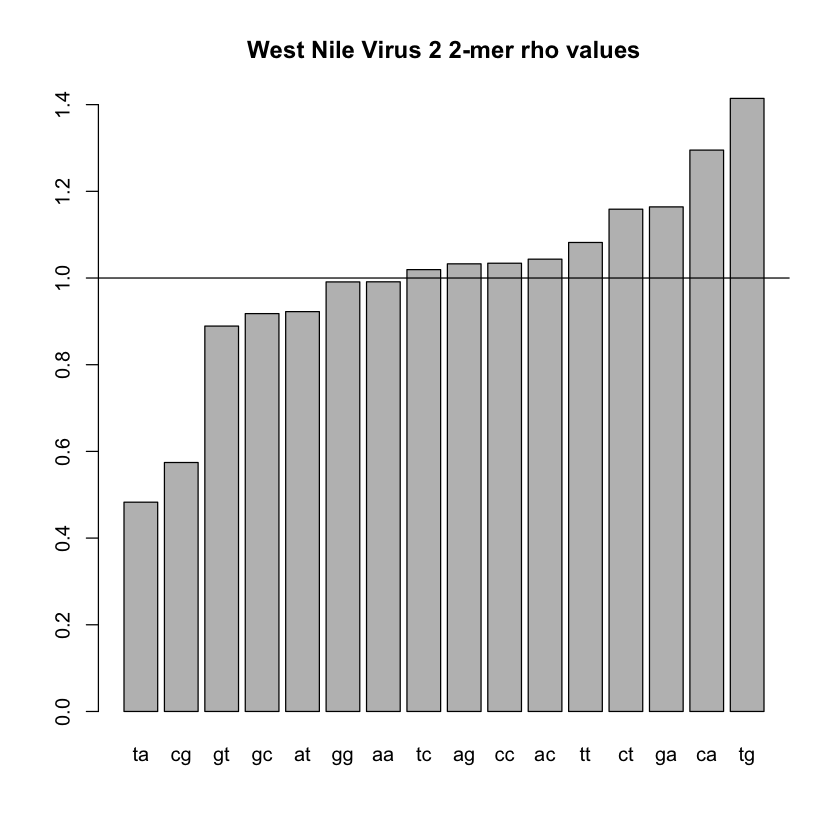

In [15]:
barplot(sort(rho(seq = west_nile2, wordsize = 2)), main="West Nile Virus 2 2-mer rho values")
abline(h=1) 

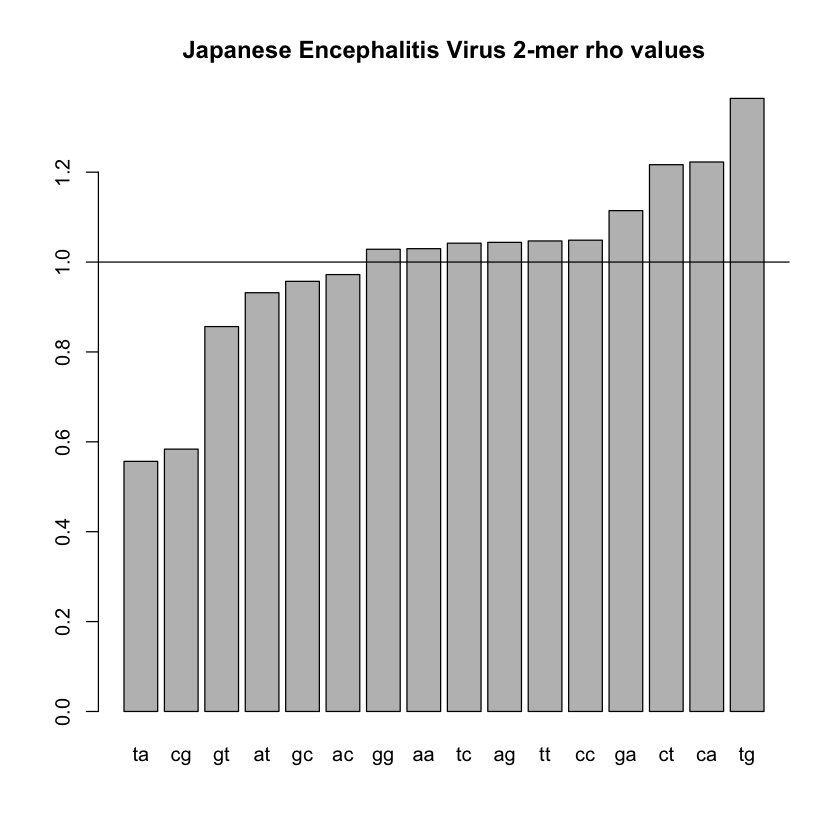

In [16]:
barplot(sort(rho(seq = encephalitis, wordsize = 2)), main="Japanese Encephalitis Virus 2-mer rho values")
abline(h=1) 

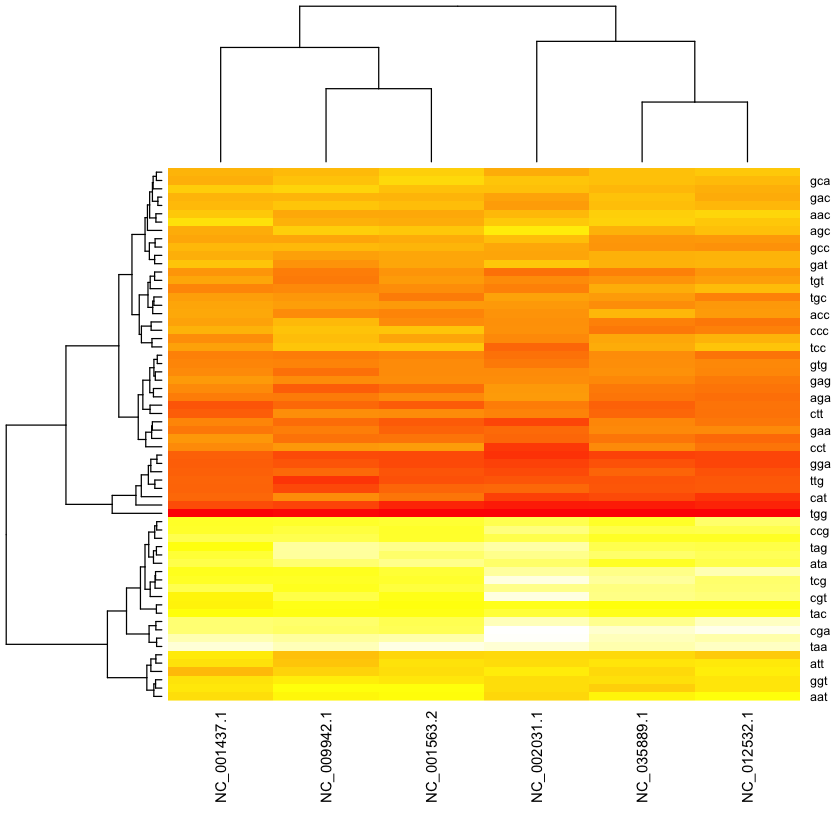

In [17]:
myrho1 <- sapply(seqs, rho, wordsize = 3)
heatmap(myrho1,margins=c(7, 2), cexCol=0.9, scale="none", col=rev(heat.colors(999)))

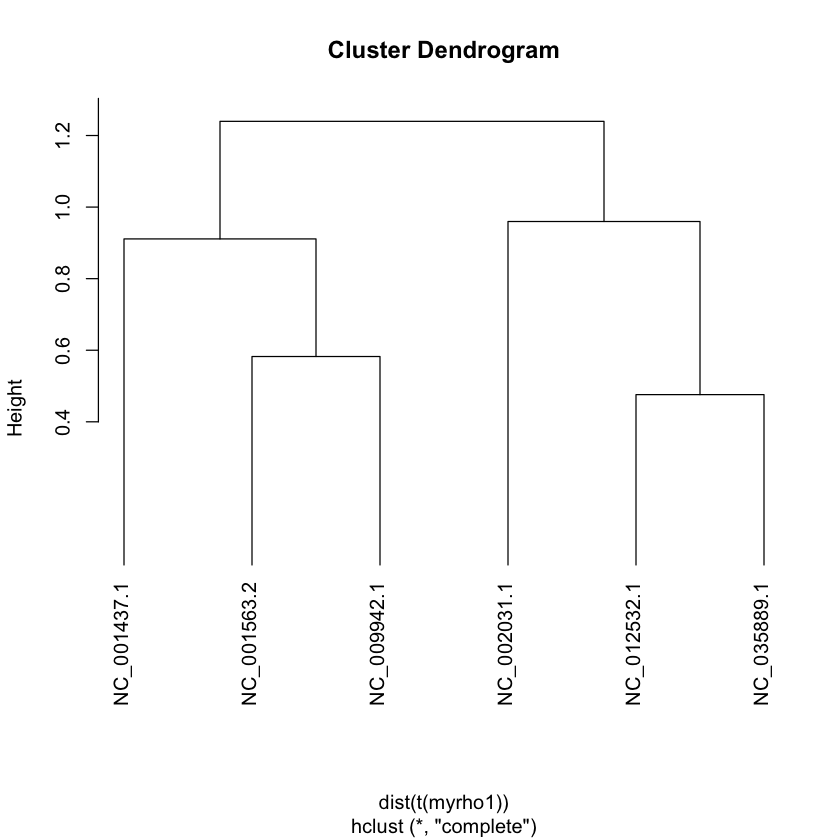

In [18]:
plot(hclust(dist(t(myrho1))), hang=-1)

### Dotplots 
The idea behind this section is to make dotplots of the Human Zika virus and other strains of other viruses to see whether they're homologous. 
(Since it takes a lot of time for the dotplot to render, I will put this on my final report.)

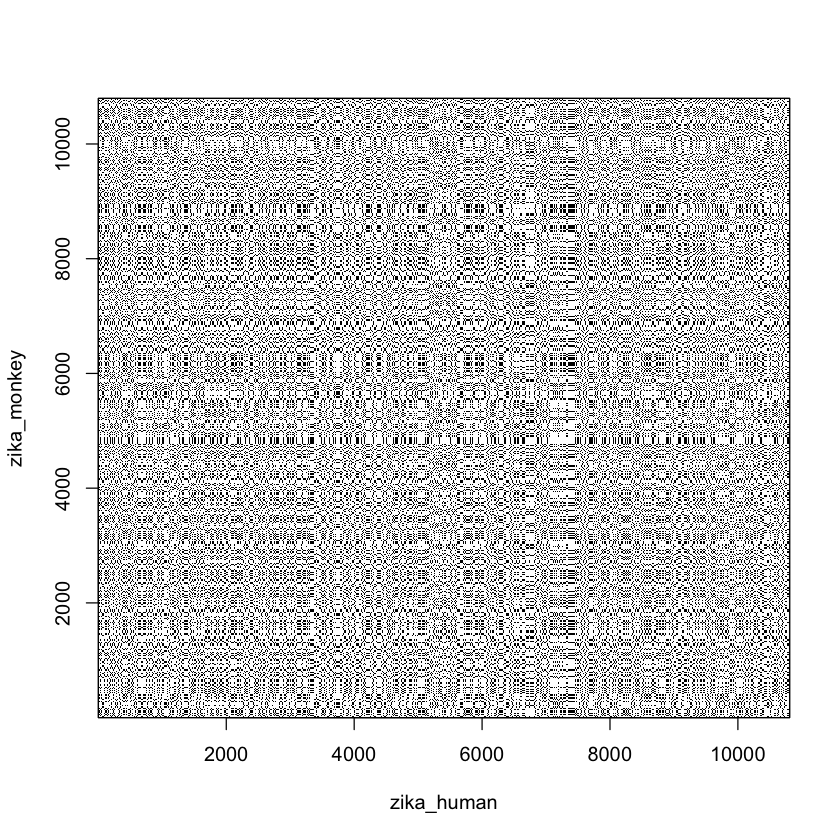

In [25]:
dotPlot(zika_human, zika_monkey)

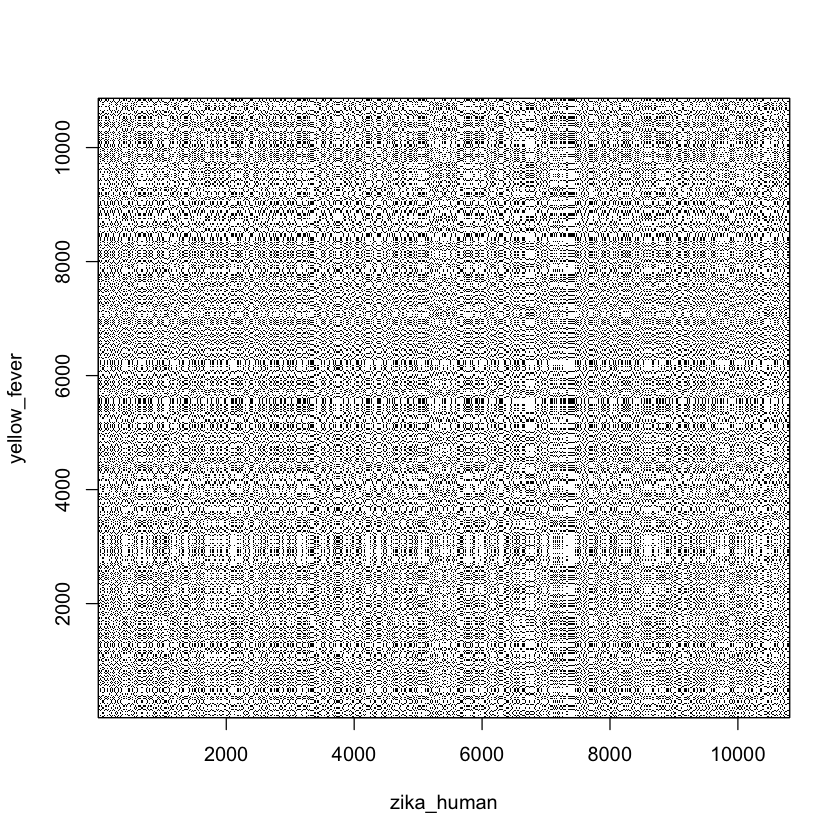

In [26]:
dotPlot(zika_human, yellow_fever)

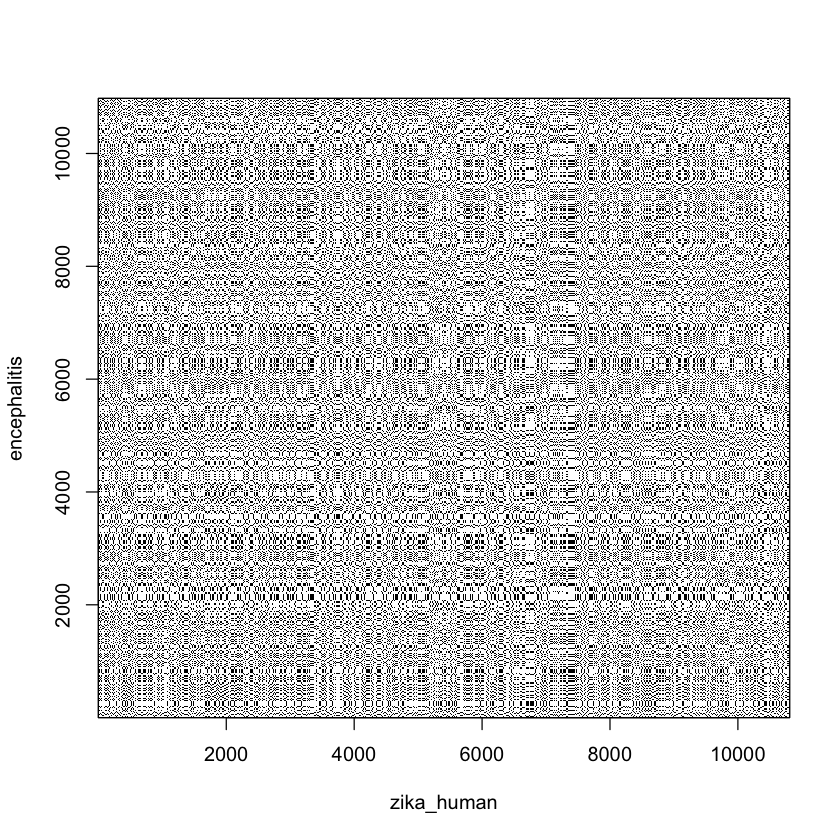

In [27]:
dotPlot(zika_human, encephalitis)

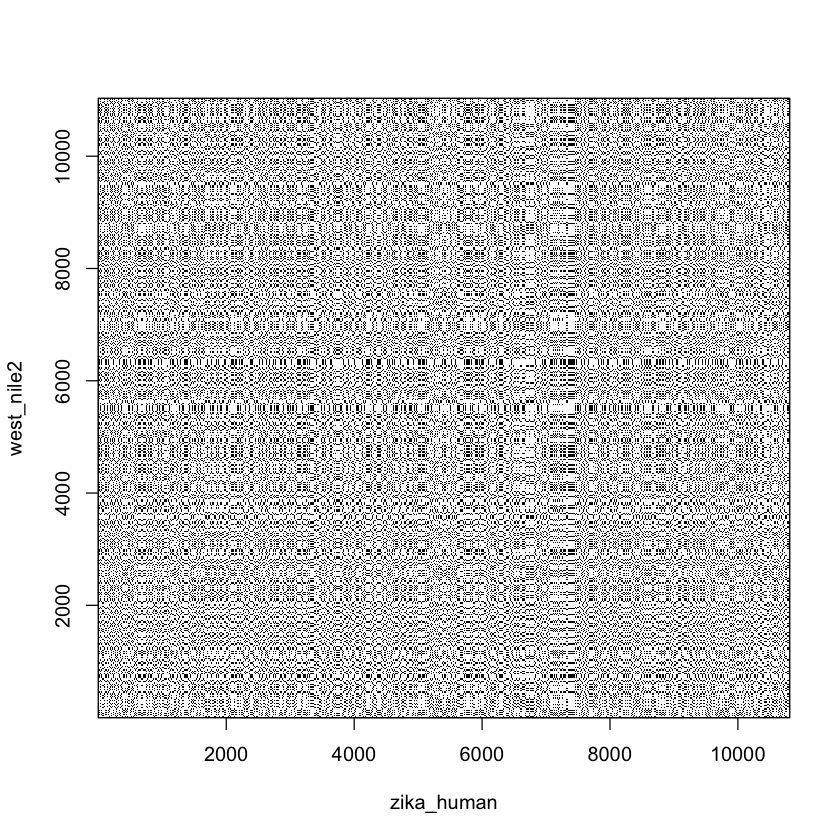

In [28]:
dotPlot(zika_human, west_nile2)

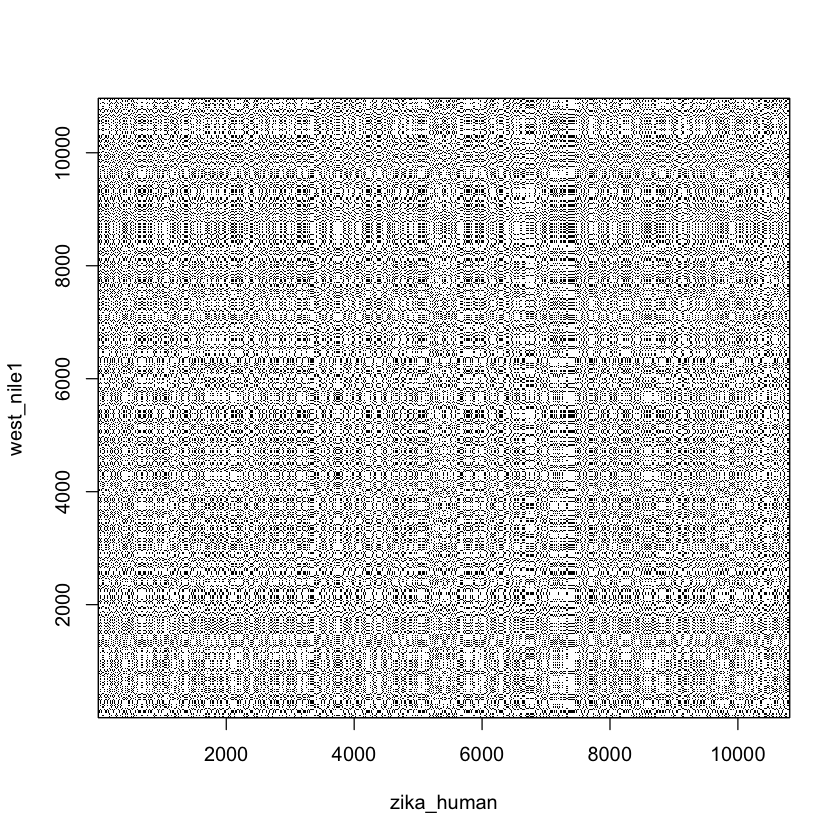

In [29]:
dotPlot(zika_human, west_nile1)

### Pairwise Sequence Alignment

In [19]:
zikahumanstring <- toupper(c2s(zika_human)) 
zikamonkeystring <- toupper(c2s(zika_monkey))
yellowfeverstring <- toupper(c2s(yellow_fever))
encephalitisstring <- toupper(c2s(encephalitis))
westnile1string <- toupper(c2s(west_nile1))
westnile2string <- toupper(c2s(west_nile2))

In [31]:
data(BLOSUM62)
myglobalAlign_zika <- pairwiseAlignment(zikahumanstring, zikamonkeystring, substitutionMatrix = "BLOSUM62",
                  gapOpening = -9.5, gapExtension = -0.5) 
myglobalAlign_zika

Global PairwiseAlignmentsSingleSubject (1 of 1)
pattern: AGTTGTTGATCTGTGTGAATCAGACTGCGACAGT...AGCGGCGGCCGGTGTGGGGAAATCCATGGGTCTT
subject: AGTTGTTGATCTGTGTGAGTCAGACTGCGACAGT...TTCGGCGGCCGGTGTGGGGAAATCCATGGTTTCT
score: 55544.5 

In [32]:
myglobalAlign_yellow <- pairwiseAlignment(zikahumanstring, yellowfeverstring, substitutionMatrix = "BLOSUM62",
                  gapOpening = -9.5, gapExtension = -0.5) 
myglobalAlign_yellow

Global PairwiseAlignmentsSingleSubject (1 of 1)
pattern: AGTTGTTGATCTGTG----------TGAATCAGA...CGGCGGCCGGTGTGGGGAAATCCATGGGTCT--T
subject: AGTAAATCCTGTGTGCTAATTGAGGTGCATTGGT...AAGCAGACCTTTGGATGACAAACACAAAACCACT
score: 30737.5 

In [33]:
myglobalAlign_enchephalitis <- pairwiseAlignment(zikahumanstring, encephalitisstring, substitutionMatrix = "BLOSUM62",
                  gapOpening = -9.5, gapExtension = -0.5) 
myglobalAlign_enchephalitis

Global PairwiseAlignmentsSingleSubject (1 of 1)
pattern: AGTTGTTGATCTGTGTGAA--TCA-GACTGCGAC...GCGGCGGCCGGTG-TGGGGAAATCCATGGGTCTT
subject: AGAAGTTTATCTGTGTGAACTTCTTGGCTTAGTA...ATG-TAGCTGGTGGTGAGGAAGAACACAGGATCT
score: 34253 

In [34]:
myglobalAlign_westnile1 <- pairwiseAlignment(zikahumanstring, westnile1string, substitutionMatrix = "BLOSUM62",
                  gapOpening = -9.5, gapExtension = -0.5) 
myglobalAlign_westnile1

Global PairwiseAlignmentsSingleSubject (1 of 1)
pattern: AGTTGTTGATCTGTGTGAATCAGACTGCGACAGT...AGCGGCGGCCGGTGTGGGGAAATCCATGGGTCTT
subject: AGTAGTTCGCCTGTGTGAG-CTGACAAACTTAGT...AG--GTGGCTGGTGGTGCTAGAACACAGGATCT-
score: 34757 

In [35]:
myglobalAlign_westnile2 <- pairwiseAlignment(zikahumanstring, westnile2string, substitutionMatrix = "BLOSUM62",
                  gapOpening = -9.5, gapExtension = -0.5) 
myglobalAlign_westnile2

Global PairwiseAlignmentsSingleSubject (1 of 1)
pattern: AGTTGTTGATCTGTGTGAATCAGACTGCGACAGT...AGCGGCGGCCGGTGTGGGGAAATCCATGGGTCTT
subject: AGTAGTTCGCCTGTGTGAG-CTGACAAACTTAGT...A-TGGTGGCTGGTGGTGCGAGAACACAGGATCT-
score: 34748.5 

### Multiple Alignment and Phylogenetic Trees

In [70]:
seqnames <- c("Q32ZE1", "A0A024B7W1", "P32886", "P06935", "Q3HM13", "P03314")
retrieve_seqs_uniprot <- function(ACCESSION) read.fasta(file=paste0("http://www.uniprot.org/uniprot/",ACCESSION,".fasta"), seqtype="AA", strip.desc=TRUE)[[1]]
seqs <- lapply(seqnames,  retrieve_seqs_uniprot)

In [71]:
write.fasta(seqs, seqnames, file="myseq.fasta")

In [72]:
mySequences <- readAAStringSet(file = "myseq.fasta")

In [73]:
myAlignment <- msa(mySequences, "ClustalW")

use default substitution matrix


In [74]:
writeXStringSet(unmasked(myAlignment), file = "myaln.fasta")

In [75]:
myaln <- read.alignment(file = "myaln.fasta", format = "fasta")

In [76]:
mydist <- dist.alignment(myaln)
mydist

              Q32ZE1 A0A024B7W1    P06935    Q3HM13    P32886
A0A024B7W1 0.1121462                                         
P06935     0.4303189  0.4309992                              
Q3HM13     0.4279918  0.4284250 0.1428780                    
P32886     0.4225400  0.4219456 0.2910262 0.2893480          
P03314     0.4854650  0.4878924 0.4887542 0.4894286 0.4962303

In [77]:
unlist(getAnnot(seqs))

[1] "sp|Q32ZE1|POLG_ZIKV Genome polyprotein OS=Zika virus OX=64320 PE=1 SV=1"                                                          
[2] "sp|A0A024B7W1|POLG_ZIKVF Genome polyprotein OS=Zika virus (isolate ZIKV/Human/French Polynesia/10087PF/2013) OX=2043570 PE=1 SV=1"
[3] "sp|P32886|POLG_JAEVJ Genome polyprotein OS=Japanese encephalitis virus (strain Jaoars982) OX=11075 PE=1 SV=1"                     
[4] "sp|P06935|POLG_WNV Genome polyprotein OS=West Nile virus OX=11082 PE=1 SV=2"                                                      
[5] "tr|Q3HM13|Q3HM13_WNV Genome polyprotein OS=West Nile virus OX=11082 PE=4 SV=1"                                                    
[6] "sp|P03314|POLG_YEFV1 Genome polyprotein OS=Yellow fever virus (strain 17D vaccine) OX=11090 PE=1 SV=1"

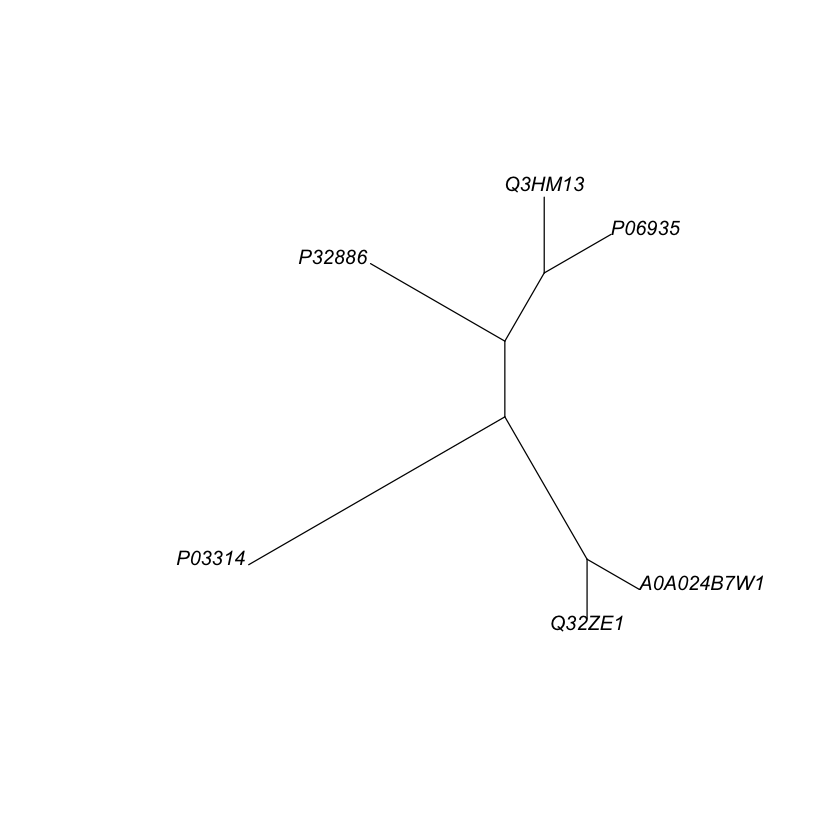

In [78]:
mytree <- nj(mydist)
plot.phylo(mytree, type="unrooted")

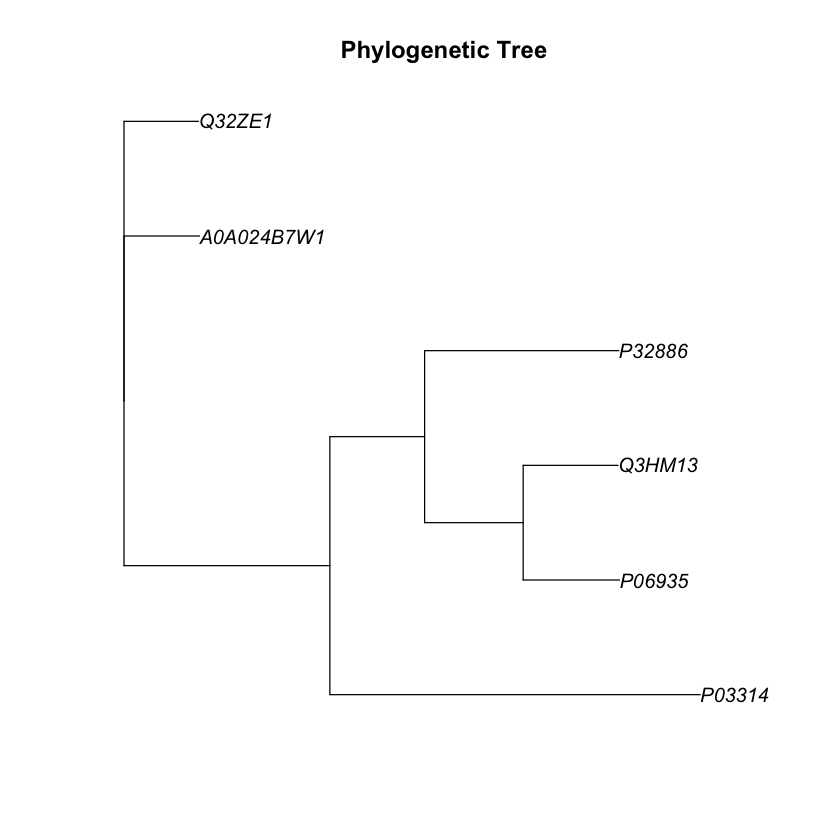

In [79]:
mytree <- root(mytree, outgroup = "Q32ZE1", resolve.root = TRUE)
plot.phylo(mytree, main = "Phylogenetic Tree")

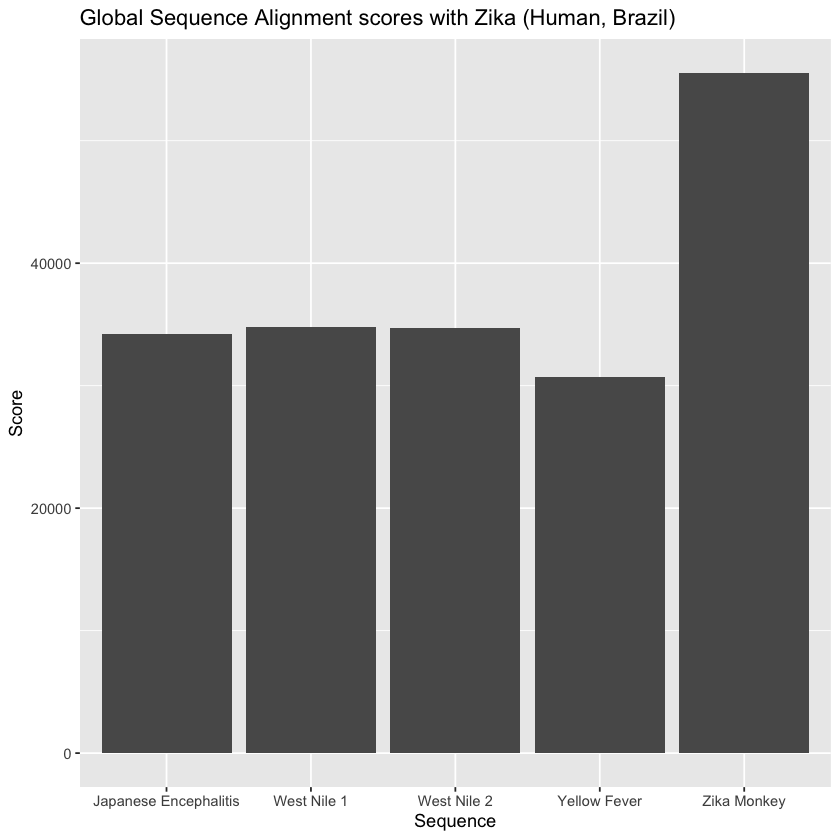

In [40]:
data <- data.frame(
  Sequence=c("Zika Monkey","Yellow Fever","Japanese Encephalitis","West Nile 1","West Nile 2") ,  
  Score=c(55544.5, 30737.5, 34253, 34757, 34748.5)
  )

# Barplot
ggplot(data, aes(x=Sequence, y=Score)) + 
  geom_bar(stat = "identity") +ggtitle("Global Sequence Alignment scores with Zika (Human, Brazil)")
